In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [10]:
lat_min = 4
lat_max = 14
lon_min = 2
lon_max = 15

In [11]:

ds = xr.open_dataset('cru_ts4.07.1901.2022.pre.dat.nc')
ds

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\binta\\Desktop\\cru_ts4.07.1901.2022.pre.dat.nc'

In [ ]:
ds = ds.sel(time=slice("1990-01-01", "2020-12-31"))

# Subset Nigeria
nigeria = ds.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)

In [ ]:
nigeria

In [ ]:
mean_pre = nigeria['pre'].mean(dim='time')

In [ ]:
# 4. Plot map
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot precipitation
mean_pre.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Blues',
    cbar_kwargs={
        'label': 'Mean Precipitation (mm/month)'
    }
)

# Add geographic features
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=1)

ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--')
ax.top_labels = False
ax.right_labels = False

ax.set_title("Mean Monthly Precipitation (1990–2020) over Nigeria", fontsize=14)

plt.show()


In [6]:
annual_total = nigeria['pre'].resample(time='Y').sum()

NameError: name 'nigeria' is not defined

In [7]:
annual_total

NameError: name 'annual_total' is not defined

In [24]:
annual_mean_series = annual_total.mean(dim=['lat', 'lon'])

In [25]:
years = annual_mean_series['time'].dt.year
precip_values = annual_mean_series.values

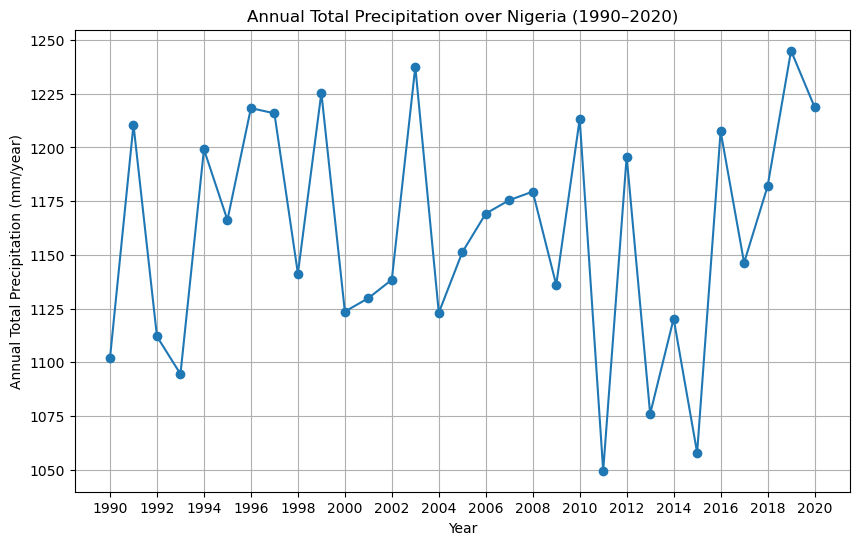

In [28]:
plt.figure(figsize=(10,6))

plt.plot(years, precip_values, marker='o')

plt.xticks(np.arange(years.min(), years.max()+1, 2))
plt.xlabel("Year")
plt.ylabel("Annual Total Precipitation (mm/year)")
plt.title("Annual Total Precipitation over Nigeria (1990–2020)")
plt.grid(True)

plt.show()


In [29]:
coefficients = np.polyfit(years, precip_values, 1)

slope = coefficients[0]
intercept = coefficients[1]

trend_line = slope * years + intercept


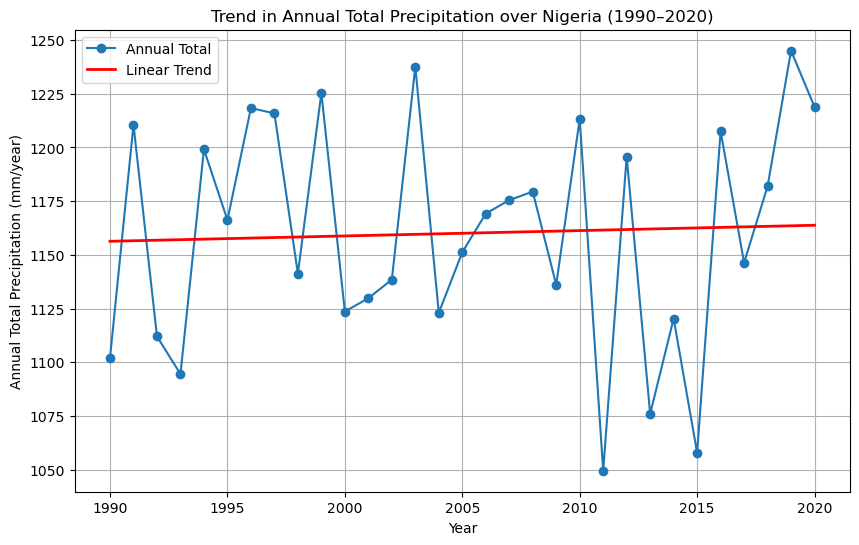

In [30]:
plt.figure(figsize=(10,6))

plt.plot(years, precip_values, marker='o', label='Annual Total')
plt.plot(years, trend_line, color='red', linewidth=2, label='Linear Trend')

plt.xlabel("Year")
plt.ylabel("Annual Total Precipitation (mm/year)")
plt.title("Trend in Annual Total Precipitation over Nigeria (1990–2020)")
plt.legend()
plt.grid(True)

plt.show()


In [31]:
print("Slope (mm/year per year):", slope)
print("Trend per decade (mm/year):", slope * 10)


Slope (mm/year per year): 0.24860726633377211
Trend per decade (mm/year): 2.4860726633377213


In [32]:
std_dev = annual_mean_series.std()
print("Standard Deviation (mm/year):", std_dev.values)


Standard Deviation (mm/year): 52.56526184082031


In [33]:
annual_total = nigeria['pre'].resample(time='Y').sum()


C:\Users\Irene\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


In [34]:
decade1 = annual_total.sel(time=slice("1990", "1999")).mean(dim='time')


In [35]:
decade2 = annual_total.sel(time=slice("2010", "2020")).mean(dim='time')


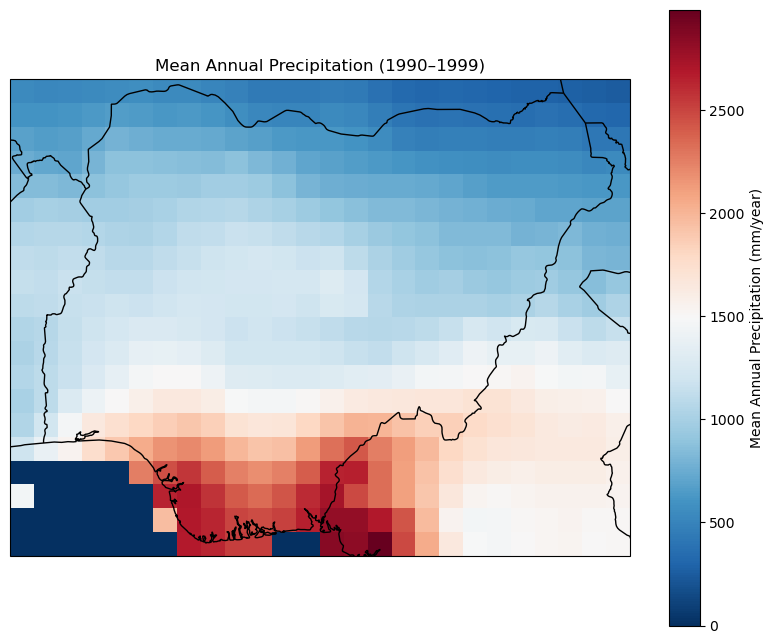

In [41]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max])

decade1.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    cbar_kwargs={'label': 'Mean Annual Precipitation (mm/year)'}
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_title("Mean Annual Precipitation (1990–1999)")

plt.show()


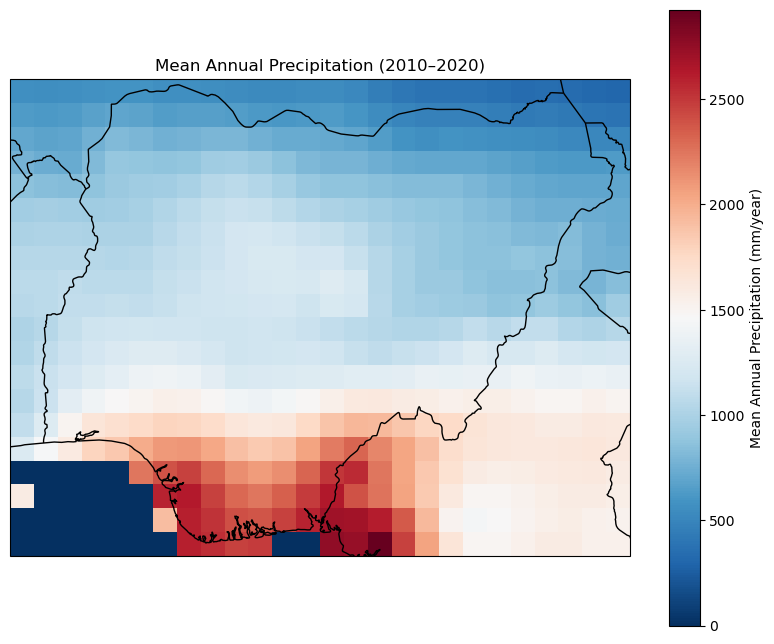

In [40]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max])

decade2.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    cbar_kwargs={'label': 'Mean Annual Precipitation (mm/year)'}
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_title("Mean Annual Precipitation (2010–2020)")

plt.show()


In [38]:
difference = decade2 - decade1


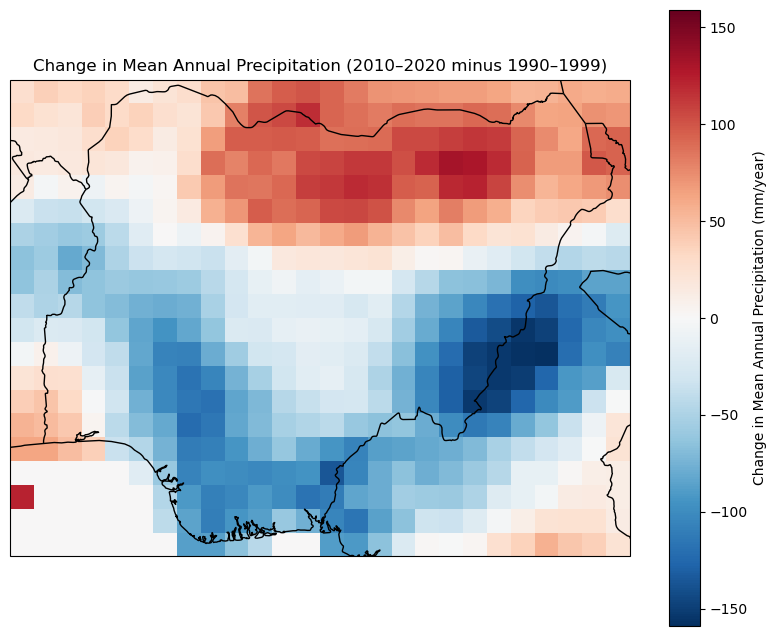

In [39]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max])

difference.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    cbar_kwargs={'label': 'Change in Mean Annual Precipitation (mm/year)'}
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_title("Change in Mean Annual Precipitation (2010–2020 minus 1990–1999)")

plt.show()


In [42]:
diff_flat = difference.stack(points=("lat", "lon"))


In [43]:
top_increase = diff_flat.sortby(diff_flat, ascending=False).isel(points=slice(0,5))


In [44]:
top_decrease = diff_flat.sortby(diff_flat).isel(points=slice(0,5))


In [45]:
increase_table = top_increase.reset_index("points").to_dataframe(name="Change_mm_per_year")
decrease_table = top_decrease.reset_index("points").to_dataframe(name="Change_mm_per_year")

print("Top 5 Increases")
print(increase_table)

print("\nTop 5 Decreases")
print(decrease_table)


Top 5 Increases
          lat    lon  Change_mm_per_year
points                                  
0       12.25  11.25          132.465454
1       12.25  11.75          129.954529
2        5.25   2.25          122.590088
3       11.75  11.75          121.661865
4       11.75  11.25          120.066284

Top 5 Decreases
         lat    lon  Change_mm_per_year
points                                 
0       8.25  13.25         -158.808350
1       8.25  12.75         -156.584473
2       8.75  12.75         -154.555420
3       7.75  12.25         -153.705444
4       7.25  11.75         -153.294678


In [46]:
annual_total = nigeria['pre'].resample(time='Y').sum()


C:\Users\Irene\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


In [47]:
p90 = annual_total.quantile(0.9, dim='time')

In [48]:
wet_years = annual_total > p90

In [49]:
wet_frequency = wet_years.sum(dim='time')

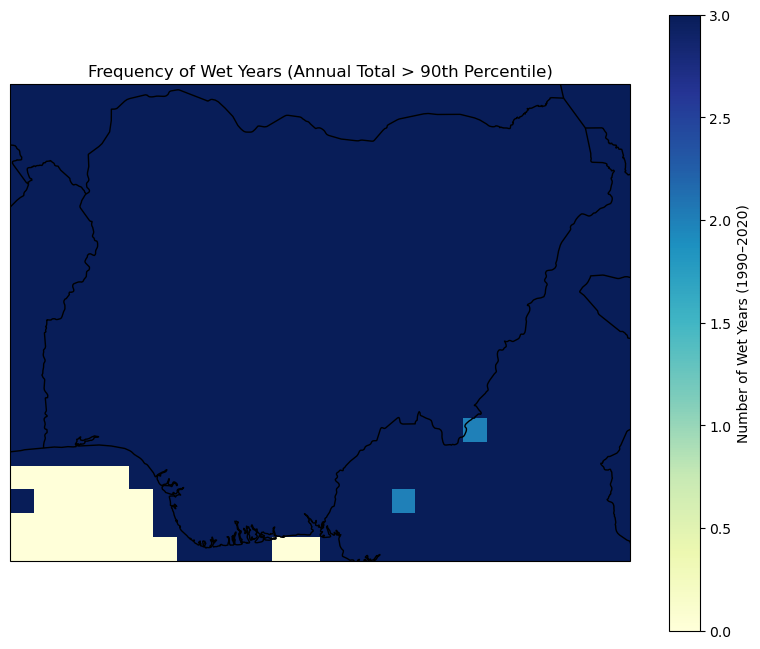

In [50]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max])

wet_frequency.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='YlGnBu',
    cbar_kwargs={'label': 'Number of Wet Years (1990–2020)'}
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_title("Frequency of Wet Years (Annual Total > 90th Percentile)")

plt.show()